In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [287]:
df = pd.read_csv('ppd_data-1.csv')

In [288]:
df = df.drop(df.columns[15:],axis=1)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31639 entries, 0 to 31638
Data columns (total 15 columns):
unique_id               31639 non-null object
price_paid              31639 non-null int64
deed_date               31639 non-null object
postcode                31597 non-null object
property_type           31639 non-null object
new_build               31639 non-null object
estate_type             31639 non-null object
saon                    6101 non-null object
paon                    31639 non-null object
street                  31639 non-null object
locality                5744 non-null object
town                    31639 non-null object
district                31639 non-null object
county                  31639 non-null object
transaction_category    31639 non-null object
dtypes: int64(1), object(14)
memory usage: 3.6+ MB


In [290]:
df = df[df['price_paid'] <= 2000000 ] 

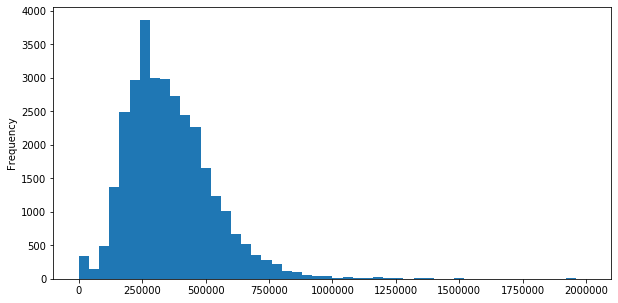

In [291]:
plt.figure(figsize=(10,5))
df['price_paid'].plot(kind='hist',bins=50)

In [292]:
df.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category
0,98C75472-AD44-72E9-E053-6B04A8C042F0,1200000,2019-10-31,E10 5AB,O,N,F,NaN,725,HIGH ROAD LEYTON,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,B
1,98C75472-AD6A-72E9-E053-6B04A8C042F0,1200000,2019-10-31,E10 5AB,O,N,F,NaN,729,HIGH ROAD LEYTON,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,B
2,115106E9-BB7B-40E4-8E3F-04BE1955531C,300000,2014-02-14,E10 5AB,T,N,F,NaN,741,HIGH ROAD LEYTON,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A
3,87E1551E-DAC2-6405-E053-6C04A8C0B2EE,475000,2019-04-01,E10 5AB,O,N,F,NaN,775,HIGH ROAD LEYTON,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,B
4,6F780634-0B87-4590-A8BC-DE45C7106587,250000,2014-10-03,E10 5AD,F,N,L,FLAT 2,"AYERST COURT, 162",BEAUMONT ROAD,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A


In [293]:
df['price_paid'].mean()

362024.1034242232

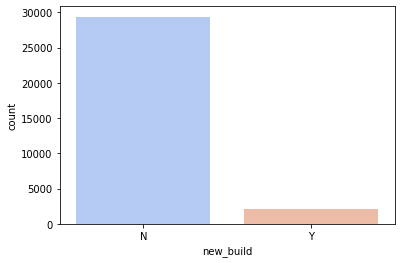

In [294]:
sns.countplot(data=df,x='new_build',palette='coolwarm')

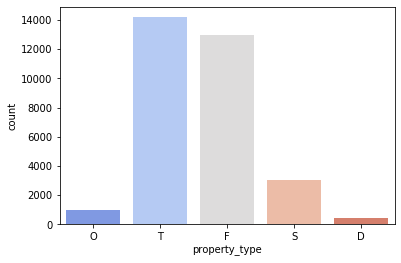

In [295]:
sns.countplot(data=df,x='property_type',palette='coolwarm')

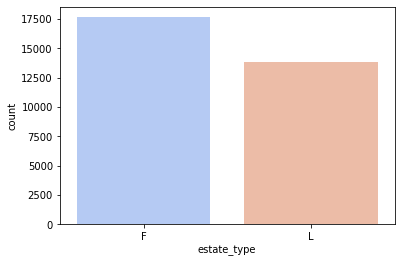

In [296]:
sns.countplot(data=df,x='estate_type',palette='coolwarm')

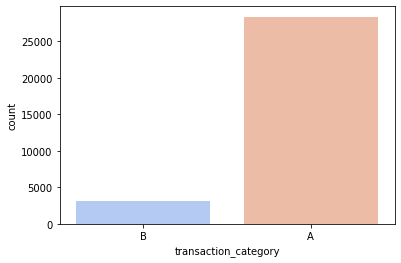

In [297]:
sns.countplot(data=df,x='transaction_category',palette='coolwarm')

In [298]:
df['deed_date'] = pd.to_datetime(df['deed_date'])

In [299]:
df['year'] = df['deed_date'].apply(lambda date : date.year )

In [300]:
df['month'] = df['deed_date'].apply(lambda date : date.month)

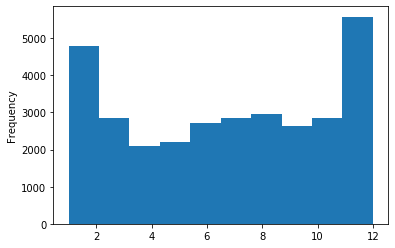

In [301]:
df['month'].plot(kind='hist') #December and January most popular months to close on houses

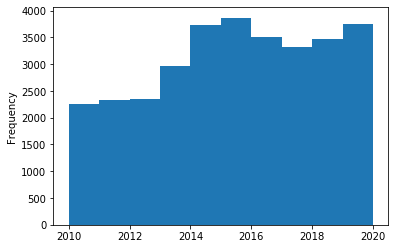

In [302]:
df['year'].plot(kind='hist') #2014 and 2015 peak year of houses sold in Waltham Forest

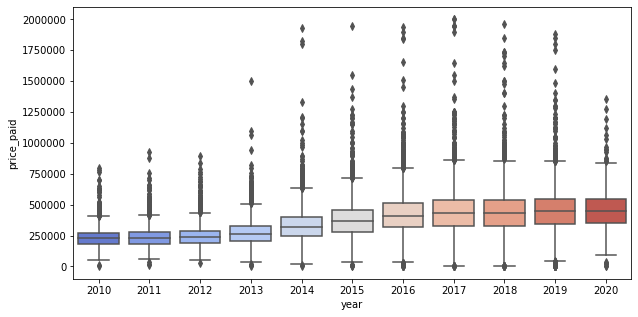

In [303]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='year',y='price_paid',palette='coolwarm') #median price paid has increased over time

In [304]:
df['new_build'] = df['new_build'].map({'N':0,'Y':1})

In [305]:
df['estate_type'] = df['estate_type'].map({'F':'Freehold','L':'Leasehold'})

In [306]:
df['property_type'] = df['property_type'].map({'O':'Other','T':'Terraced','F':'Flat Maisonette','S':'Semi-Detached'
                                              ,'D':'Detached'})

In [307]:
df = df.drop(['transaction_category','unique_id','paon','saon','deed_date'],axis=1)

In [308]:
df['locality'].value_counts()

WALTHAMSTOW       2783
LEYTON            1102
CHINGFORD         1064
LEYTONSTONE        722
FOREST GATE         59
HIGHAMS PARK         5
WOODFORD GREEN       1
Name: locality, dtype: int64

In [309]:
df['town'].value_counts()

LONDON            30873
WOODFORD GREEN      666
ENFIELD               1
Name: town, dtype: int64

In [310]:
df['district'].value_counts()

WALTHAM FOREST    31540
Name: district, dtype: int64

In [311]:
df['county'].value_counts()

GREATER LONDON    31540
Name: county, dtype: int64

In [312]:
df = df.drop(['district','county','town','locality'],axis=1)

In [313]:
df = df.drop('street',axis=1)

In [314]:
df['postcode'].value_counts()

E10 7JQ    151
E10 5FA     99
E4 9BF      87
E17 9JD     82
E17 5FU     81
          ... 
E17 5YD      1
E17 4FA      1
E4 6NF       1
IG8 9SE      1
E9 5GZ       1
Name: postcode, Length: 2929, dtype: int64

In [315]:
#Remove last 2 characters from postcode string 
df['postcode_short'] = df['postcode'].str[:-2]
#number of unique 4 digit postcodes in Waltham Forest
df['postcode_short'].nunique()

28

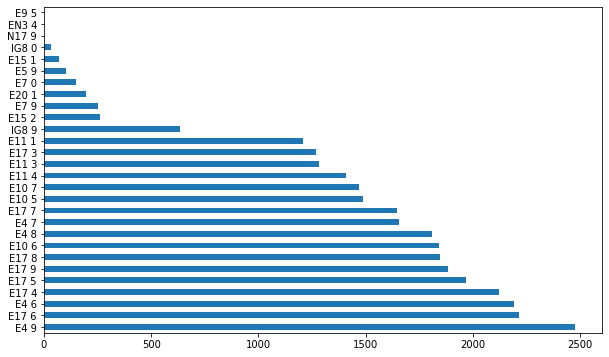

In [282]:
plt.figure(figsize=(10,6))
df['postcode_short'].value_counts().plot(kind='barh')

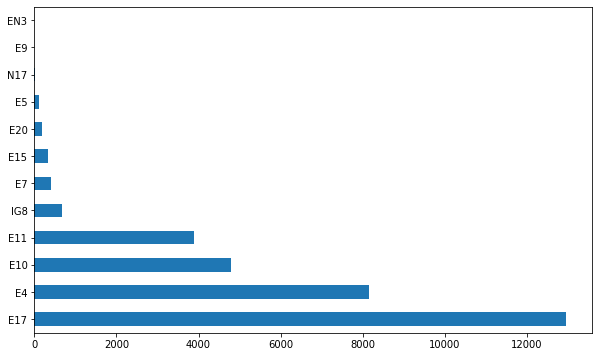

In [316]:
x2 = df['postcode_short'].str[:-2]
plt.figure(figsize=(10,6))
x2.value_counts().plot(kind='barh')

In [317]:
df.head()

,price_paid,postcode,property_type,new_build,estate_type,year,month,postcode_short
0,1200000,E10 5AB,Other,0,Freehold,2019,10,E10 5
1,1200000,E10 5AB,Other,0,Freehold,2019,10,E10 5
2,300000,E10 5AB,Terraced,0,Freehold,2014,2,E10 5
3,475000,E10 5AB,Other,0,Freehold,2019,4,E10 5
4,250000,E10 5AD,Flat Maisonette,0,Leasehold,2014,10,E10 5


In [318]:
df = df.dropna()

In [319]:
df = df.drop('postcode',axis=1)

In [320]:
df = df.drop('month',axis=1)

In [321]:
df.isnull().sum()

price_paid        0
property_type     0
new_build         0
estate_type       0
year              0
postcode_short    0
dtype: int64

In [322]:
#Completely removed null values now onto creating dummy variables out of categorical features

In [323]:
propertytype_dummies = pd.get_dummies(df['property_type'],drop_first=False)

In [324]:
df = pd.concat([df.drop('property_type',axis=1),propertytype_dummies],axis=1)

In [325]:
df.head()

,price_paid,new_build,estate_type,year,postcode_short,Detached,Flat Maisonette,Other,Semi-Detached,Terraced
0,1200000,0,Freehold,2019,E10 5,0,0,1,0,0
1,1200000,0,Freehold,2019,E10 5,0,0,1,0,0
2,300000,0,Freehold,2014,E10 5,0,0,0,0,1
3,475000,0,Freehold,2019,E10 5,0,0,1,0,0
4,250000,0,Leasehold,2014,E10 5,0,1,0,0,0


In [326]:
estate_type_dummies = pd.get_dummies(df['estate_type'],drop_first=False)
df = pd.concat([df.drop('estate_type',axis=1),estate_type_dummies],axis=1)

In [335]:
postcode_dummies = pd.get_dummies(df['postcode_short'],drop_first=False)
df = pd.concat([df.drop('postcode_short',axis=1),postcode_dummies],axis=1)

In [336]:
df.head()

,price_paid,new_build,year,Detached,Flat Maisonette,Other,Semi-Detached,Terraced,Freehold,Leasehold,...,E4 8,E4 9,E5 9,E7 0,E7 9,E9 5,EN3 4,IG8 0,IG8 9,N17 9
0,1200000,0,2019,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1200000,0,2019,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,300000,0,2014,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,475000,0,2019,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,0,2014,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [328]:
from sklearn.model_selection import train_test_split

In [349]:
#Passing through X & y in values for neural network model
X = df.drop('price_paid',axis=1).values
y = df['price_paid'].values

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [351]:
from sklearn.preprocessing import MinMaxScaler

In [352]:
scaler = MinMaxScaler()

In [353]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [355]:
X_train.shape

(22053, 37)

In [356]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [357]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Train on 22053 samples, validate on 9452 samples
Epoch 1/400
22053/22053 [==============================] - 3s 114us/sample - loss: 160520784457.7133 - val_loss: 162658200461.1629
Epoch 2/400
22053/22053 [==============================] - 1s 56us/sample - loss: 148837099750.9607 - val_loss: 123281572803.7647
Epoch 3/400
22053/22053 [==============================] - 1s 54us/sample - loss: 65867131226.2089 - val_loss: 29249868724.1642
Epoch 4/400
22053/22053 [==============================] - 1s 53us/sample - loss: 24590844398.8428 - val_loss: 23735087064.1320
Epoch 5/400
22053/22053 [==============================] - 1s 52us/sample - loss: 21662974355.5079 - val_loss: 21868745229.2171
Epoch 6/400
22053/22053 [==============================] - 1s 51us/sample - loss: 20314280018.0946 - val_loss: 20865317807.8307
Epoch 7/400
22053/22053 [==============================] - 1s 50us/sample - loss: 19505645598.4140 - val_loss: 20195086148.7939
Epoch 8/400
22053/22053 [=========================

22053/22053 [==============================] - 1s 52us/sample - loss: 14196400867.4549 - val_loss: 15635926679.4549
Epoch 128/400
22053/22053 [==============================] - 1s 53us/sample - loss: 14199039929.0030 - val_loss: 15630743384.7279
Epoch 129/400
22053/22053 [==============================] - 1s 52us/sample - loss: 14191037076.2857 - val_loss: 15630720341.9111
Epoch 130/400
22053/22053 [==============================] - 1s 54us/sample - loss: 14185010112.2931 - val_loss: 15630785759.1739
Epoch 131/400
22053/22053 [==============================] - 1s 50us/sample - loss: 14188206251.1542 - val_loss: 15663639833.2425
Epoch 132/400
22053/22053 [==============================] - 1s 52us/sample - loss: 14188967689.6930 - val_loss: 15626570448.2234
Epoch 133/400
22053/22053 [==============================] - 1s 50us/sample - loss: 14186463840.9766 - val_loss: 15623363994.3800
Epoch 134/400
22053/22053 [==============================] - 1s 51us/sample - loss: 14185363556.2501 - v

22053/22053 [==============================] - 1s 52us/sample - loss: 14119097038.3277 - val_loss: 15604687450.3529
Epoch 254/400
22053/22053 [==============================] - 1s 52us/sample - loss: 14117068223.2484 - val_loss: 15591446834.8100
Epoch 255/400
22053/22053 [==============================] - 1s 65us/sample - loss: 14115066165.1084 - val_loss: 15589863068.6551
Epoch 256/400
22053/22053 [==============================] - 1s 53us/sample - loss: 14111249524.7341 - val_loss: 15598286833.2662
Epoch 257/400
22053/22053 [==============================] - 1s 50us/sample - loss: 14112116288.6820 - val_loss: 15613307738.0279
Epoch 258/400
22053/22053 [==============================] - 1s 52us/sample - loss: 14116439998.0643 - val_loss: 15652885760.9750
Epoch 259/400
22053/22053 [==============================] - 1s 61us/sample - loss: 14112054850.4233 - val_loss: 15628835847.3669
Epoch 260/400
22053/22053 [==============================] - 1s 53us/sample - loss: 14112438792.0794 - v

Epoch 316/400
22053/22053 [==============================] - 1s 54us/sample - loss: 14021153284.4344 - val_loss: 15551355361.0157
Epoch 317/400
22053/22053 [==============================] - 1s 56us/sample - loss: 14023658786.7439 - val_loss: 15553169948.8176
Epoch 318/400
22053/22053 [==============================] - 1s 53us/sample - loss: 14021367062.7873 - val_loss: 15560269797.1325
Epoch 319/400
22053/22053 [==============================] - 1s 55us/sample - loss: 14012091341.6196 - val_loss: 15552496058.8811
Epoch 320/400
22053/22053 [==============================] - 1s 50us/sample - loss: 14011210792.6758 - val_loss: 15564972725.3559
Epoch 321/400
22053/22053 [==============================] - 1s 51us/sample - loss: 14004348514.6482 - val_loss: 15586086268.9124
Epoch 322/400
22053/22053 [==============================] - 1s 54us/sample - loss: 14012567705.9041 - val_loss: 15532402626.4647
Epoch 323/400
22053/22053 [==============================] - 1s 50us/sample - loss: 140012

22053/22053 [==============================] - 1s 55us/sample - loss: 13705006276.9713 - val_loss: 15382802893.9484
Epoch 380/400
22053/22053 [==============================] - 1s 57us/sample - loss: 13711743723.1165 - val_loss: 15380227085.4338
Epoch 381/400
22053/22053 [==============================] - 1s 57us/sample - loss: 13705439473.0368 - val_loss: 15357340896.9073
Epoch 382/400
22053/22053 [==============================] - 1s 51us/sample - loss: 13699785690.9924 - val_loss: 15376408423.4617
Epoch 383/400
22053/22053 [==============================] - 1s 52us/sample - loss: 13697210337.9342 - val_loss: 15356609007.7495
Epoch 384/400
22053/22053 [==============================] - 1s 52us/sample - loss: 13699049153.1405 - val_loss: 15362931348.4215
Epoch 385/400
22053/22053 [==============================] - 1s 53us/sample - loss: 13691018914.5408 - val_loss: 15410452790.2768
Epoch 386/400
22053/22053 [==============================] - 1s 56us/sample - loss: 13691270046.7216 - v

In [359]:

losses = pd.DataFrame(model.history.history)

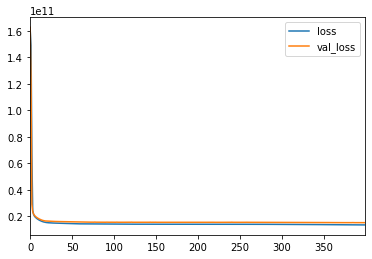

In [360]:
losses.plot()

In [361]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [362]:
predictions = model.predict(X_test)

In [363]:
np.sqrt(mean_squared_error(y_test,predictions))

123883.77602370057

In [364]:
mean_absolute_error(y_test,predictions)

78278.65035425704

In [365]:
df['price_paid'].mean()

362128.08268528804

In [366]:
explained_variance_score(y_test,predictions)

0.5033550102613931

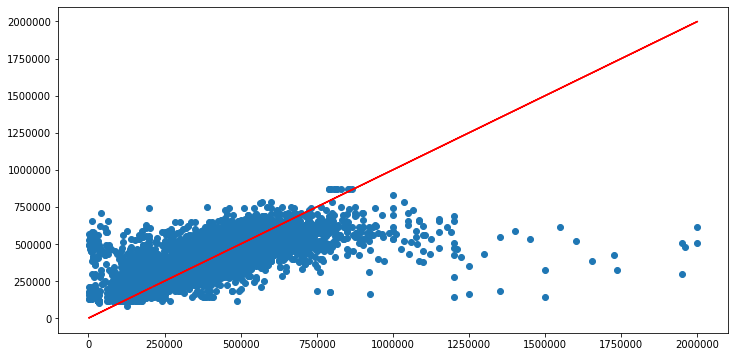

In [367]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [368]:
#Outliers so properties in excess of 1 million may be better to remove

In [370]:
new_house = df.drop('price_paid',axis=1).iloc[99]

In [372]:
new_house = scaler.transform(new_house.values.reshape(-1,37))

In [373]:
model.predict(new_house)

array([[498909.12]], dtype=float32)

In [376]:
df.iloc[99]['price_paid']

625000

In [377]:
#Attempt two - removing properties between 1 to 2 million

In [417]:
df1 = df[df['price_paid'] <= 800000 ] 

In [418]:
df1.head()

,price_paid,new_build,year,Detached,Flat Maisonette,Other,Semi-Detached,Terraced,Freehold,Leasehold,...,E4 8,E4 9,E5 9,E7 0,E7 9,E9 5,EN3 4,IG8 0,IG8 9,N17 9
2,300000,0,2014,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,475000,0,2019,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,0,2014,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,145000,0,2012,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,215000,0,2014,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [419]:
X = df1.drop('price_paid',axis=1).values
y = df1['price_paid'].values

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [421]:
scaler = MinMaxScaler()

In [422]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [423]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [424]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs=50)

Train on 21682 samples, validate on 9293 samples
Epoch 1/50
21682/21682 [==============================] - 3s 121us/sample - loss: 145232008068.3568 - val_loss: 147142101204.2268
Epoch 2/50
21682/21682 [==============================] - 1s 54us/sample - loss: 140029829279.4421 - val_loss: 129062554557.1144
Epoch 3/50
21682/21682 [==============================] - 1s 52us/sample - loss: 87573968592.4177 - val_loss: 41310758430.0269
Epoch 4/50
21682/21682 [==============================] - 1s 53us/sample - loss: 22928289399.5344 - val_loss: 17413429823.4146
Epoch 5/50
21682/21682 [==============================] - 1s 54us/sample - loss: 16156530783.6842 - val_loss: 15381428254.1922
Epoch 6/50
21682/21682 [==============================] - 1s 52us/sample - loss: 14721424179.7856 - val_loss: 14360910180.0254
Epoch 7/50
21682/21682 [==============================] - 1s 53us/sample - loss: 13924871199.9262 - val_loss: 13720561476.1253
Epoch 8/50
21682/21682 [==============================] -

In [425]:
losses = pd.DataFrame(model.history.history)

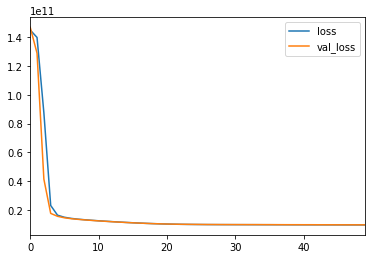

In [426]:
losses.plot()

In [427]:
predictions = model.predict(X_test)

In [428]:
np.sqrt(mean_squared_error(y_test,predictions))

97124.53599895725

In [429]:
mean_absolute_error(y_test,predictions)

72640.23869343598

In [430]:
df1['price_paid'].mean()

351179.0261824052

In [431]:
explained_variance_score(y_test,predictions)

0.5865220005445895

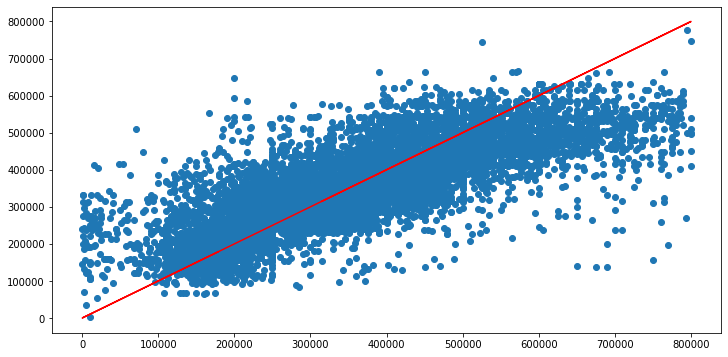

In [432]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [437]:
new_house = df1.drop('price_paid',axis=1).iloc[109]

In [438]:
new_house = scaler.transform(new_house.values.reshape(-1,37))

In [439]:
model.predict(new_house)

array([[149623.53]], dtype=float32)

In [440]:
df1.iloc[109]['price_paid']

120000